#### Tasks Day 25

In [62]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

data = {
    'name': ['John', 'Alice', 'Bob', 'Alice', 'David', 'John'],
    'age': [25, 30, 22, 30, 28, 25],
    'salary': [50000, 60000, 55000, 60000, 120000, 50000]  # 120000 is an outlier
}

df = pd.DataFrame(data)
print(df)


    name  age  salary
0   John   25   50000
1  Alice   30   60000
2    Bob   22   55000
3  Alice   30   60000
4  David   28  120000
5   John   25   50000


##### 1. df.duplicated().sum()

In [63]:
# Counts duplicate rows
df.duplicated().sum()

np.int64(2)

##### 2. df.drop_duplicates(inplace=True)

In [64]:
# Removes repeated full rows
df.drop_duplicates(inplace=True)
print(df)

    name  age  salary
0   John   25   50000
1  Alice   30   60000
2    Bob   22   55000
4  David   28  120000


##### 3. df.drop_duplicates(subset=['name', 'age'], keep='first', inplace=True)

In [65]:
# Removes duplicates based only on selected columns
df.drop_duplicates(subset=['name', 'age'], keep='first', inplace=True)
print(df)

    name  age  salary
0   John   25   50000
1  Alice   30   60000
2    Bob   22   55000
4  David   28  120000


##### 4. df['name'].is_unique

In [66]:
# Checks whether all values in the column are unique
df['name'].is_unique

True

##### 5. df.boxplot(column=['salary'])

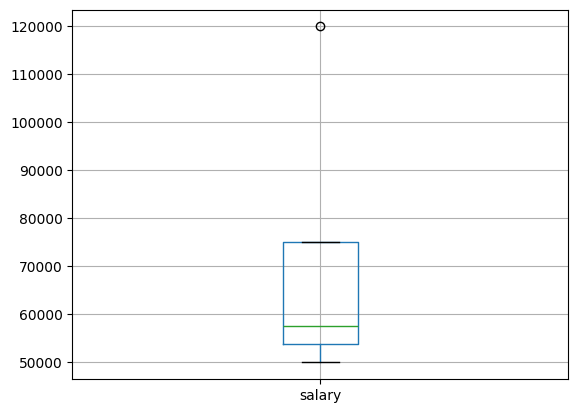

In [67]:
# Creates a boxplot to detect salary outliers (120000 spikes higher)
import matplotlib.pyplot as plt

df.boxplot(column=['salary'])
plt.show()

##### 6. from scipy.stats import zscore
##### 7. df[(np.abs(zscore(df['salary'])) > 1)]

In [68]:
from scipy.stats import zscore
df['zscore_salary'] = zscore(df['salary'])
print(df)
df[(np.abs(zscore(df['salary'])) > 1)]

    name  age  salary  zscore_salary
0   John   25   50000      -0.749110
1  Alice   30   60000      -0.396587
2    Bob   22   55000      -0.572848
4  David   28  120000       1.718545


,name,age,salary,zscore_salary
4,David,28,120000,1.718545


##### 8. Q1 = df['salary'].quantile(0.25)

In [69]:
# 25th percentile
Q1 = df['salary'].quantile(0.25)
print(Q1)

53750.0


##### 9. Q3 = df['salary'].quantile(0.75)

In [70]:
# 75th percentile
Q3 = df['salary'].quantile(0.75)
print(Q3)

75000.0


##### 10. IQR = Q3 - Q1

In [71]:
IQR = Q3 - Q1
print(IQR)

21250.0


##### 11. IQR Method Outliers

In [72]:
df[(df['salary'] < (Q1 - 1.5 * IQR)) | (df['salary'] > (Q3 + 1.5 * IQR))]


,name,age,salary,zscore_salary
4,David,28,120000,1.718545


##### 12. df['salary'] = np.log1p(df['salary'])

In [73]:
df['salary'] = np.log1p(df['salary'])
print(df)

    name  age     salary  zscore_salary
0   John   25  10.819798      -0.749110
1  Alice   30  11.002117      -0.396587
2    Bob   22  10.915107      -0.572848
4  David   28  11.695255       1.718545


##### 13. Capping / Winsorization